# Pre-processing external dataset for project 2: Education

School and enrolments by LGA

The summary statistics are revised in April and July each year. The 'summary statistics snapshot' provides a quick overview of key statistics such as numbers of students, teachers and schools: Split up in governmental, catholic and independent schools.

The data is extracted from victoria's gvoernmental website
summary statistics July 2021: https://www.education.vic.gov.au/Documents/about/department/summarystatssnapshot.pdf

FTE: Full Time-equivalence teachers

Source: https://www.vic.gov.au/statistics-victorian-schools-and-teaching#summary-statistics-on-victorian-schools




In [33]:
#Initialization packages
import os
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#Direction to working directory
os.chdir('/Users/axbmac/Desktop/Applied Data Science/Project 2/External data')
print("Current working directory: {0}".format(os.getcwd())) 

Current working directory: /Users/axbmac/Desktop/Applied Data Science/Project 2/External Data


In [35]:
edu=pd.read_excel('Schools_by_LGA.xlsx')

#edu.describe()

edu.head()

,Row Labels,Sum of FTE Enrolments,Sum of No Of Schools,Sum of FTE Enrolments.1,Sum of No Of Schools.1,Sum of FTE Enrolments.2,Sum of No Of Schools.2,Unnamed: 7,Unnamed: 8
0,Alpine (S),1498.0,9,341.0,2.0,NaN,NaN,1839.0,11
1,Ararat (RC),1059.9,11,583.0,2.0,NaN,NaN,1642.9,13
2,Ballarat (C),11537.9,30,6539.4,14.0,3721.4,4.0,21798.7,48
3,Banyule (C),14328.0,28,6738.4,11.0,2298.0,3.0,23364.4,42
4,Bass Coast (S),3725.0,10,378.8,2.0,1018.0,3.0,5121.8,15


In [51]:
#Renaming the columns across Governmental, Catholic, Independent and all Schools

education=edu.rename(columns={"Row Labels":"Local government areas of Victoria","Sum of FTE Enrolments":"Sum of Governmental FTE Enrolments","Sum of No Of Schools": "Sum of No of Governmental Schools","Sum of FTE Enrolments.1":"Sum of Catholic FTE Enrolments","Sum of No Of Schools.1": "Sum of No of Catholic Schools","Sum of FTE Enrolments.2":"Sum of Independent FTE Enrolments","Sum of No Of Schools.2": "Sum of No of Independent Schools","Unnamed: 7":"Sum of Total FTE Enrolments","Unnamed: 8": "Sum of No of Total Schools"})
print(education.head())

  Local government areas of Victoria  Sum of Governmental FTE Enrolments  \
0                         Alpine (S)                              1498.0   
1                        Ararat (RC)                              1059.9   
2                       Ballarat (C)                             11537.9   
3                        Banyule (C)                             14328.0   
4                     Bass Coast (S)                              3725.0   

   Sum of No of Governmental Schools  Sum of Catholic FTE Enrolments  \
0                                  9                           341.0   
1                                 11                           583.0   
2                                 30                          6539.4   
3                                 28                          6738.4   
4                                 10                           378.8   

   Sum of No of Catholic Schools  Sum of Independent FTE Enrolments  \
0                            2.0       

In [52]:
#Okay, so I would arguing that NaN significes that there is no schools in the LGA
#For that reason I will handle my Non Announced Values as being 0
#Thus, I assign NaN to 0 

education.fillna(0)


,Local government areas of Victoria,Sum of Governmental FTE Enrolments,Sum of No of Governmental Schools,Sum of Catholic FTE Enrolments,Sum of No of Catholic Schools,Sum of Independent FTE Enrolments,Sum of No of Independent Schools,Sum of Total FTE Enrolments,Sum of No of Total Schools
0,Alpine (S),1498.0,9,341.0,2.0,0.0,0.0,1839.0,11
1,Ararat (RC),1059.9,11,583.0,2.0,0.0,0.0,1642.9,13
2,Ballarat (C),11537.9,30,6539.4,14.0,3721.4,4.0,21798.7,48
3,Banyule (C),14328.0,28,6738.4,11.0,2298.0,3.0,23364.4,42
4,Bass Coast (S),3725.0,10,378.8,2.0,1018.0,3.0,5121.8,15
...,...,...,...,...,...,...,...,...,...
75,Wodonga (C),4917.2,9,2448.0,4.0,1233.8,3.0,8599.0,16
76,Wyndham (C),36367.7,37,10049.8,15.0,8088.0,5.0,54505.5,57
77,Yarra (C),8480.1,19,1644.6,6.0,962.7,4.0,11087.4,29
78,Yarra Ranges (S),16974.7,58,4046.4,10.0,4272.0,12.0,25293.1,80


In [54]:
value = education.isnull().values.any()

print(value)

#So it says that there is still Non Annoounced values


True


(array([ 3., 10., 11.,  9.,  6.,  5.,  6.,  4.,  5.,  3.,  4.,  5.,  2.,
         3.,  1.,  0.,  0.,  0.,  1.,  2.]),
 array([ 2.  ,  6.15, 10.3 , 14.45, 18.6 , 22.75, 26.9 , 31.05, 35.2 ,
        39.35, 43.5 , 47.65, 51.8 , 55.95, 60.1 , 64.25, 68.4 , 72.55,
        76.7 , 80.85, 85.  ]),
 <BarContainer object of 20 artists>)

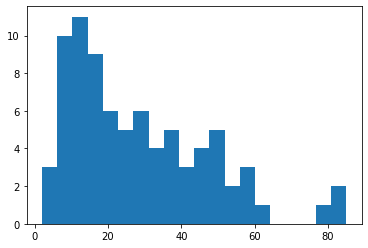

In [57]:
plt.hist(education["Sum of No of Total Schools"],bins=20)

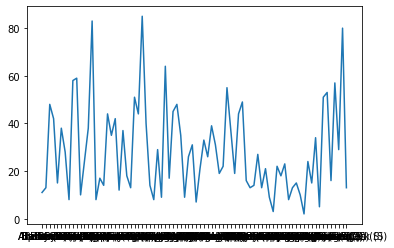

In [71]:
plt.plot(edu["Local government areas of Victoria"],edu["Sum of No of Total Schools"])
